# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\H P\OneDrive\Desktop\BA\Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.shape

(50000, 14)

In [9]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

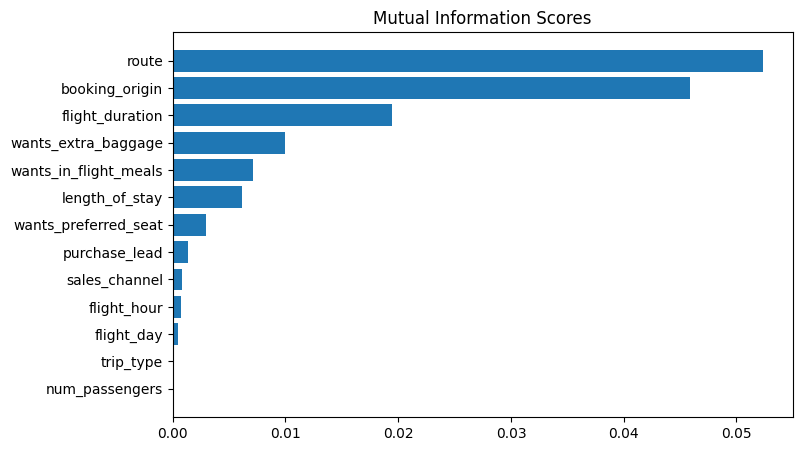

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Assuming X and y are already defined
X = df.drop('booking_complete', axis=1)
y = df.booking_complete

# Changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Define a function to plot MI scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Plot the MI scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Function to split the dataset into train, validation, and test sets
def dataset_split(X, y):
    # Split the dataset into train_full and test sets
    train_full_X, test_X, train_full_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    # Split the train_full set into train and validation sets
    train_X, val_X, train_y, val_y = train_test_split(train_full_X, train_full_y, test_size=0.25, random_state=0)
    return train_X, val_X, test_X, train_y, val_y, test_y

# Function to scale the features
def scale_features(X):
    scaler = MinMaxScaler()
    scaled_X = scaler.fit_transform(X)
    return scaled_X

# Split the dataset into train, validation, and test sets
train_X, val_X, test_X, train_y, val_y, test_y = dataset_split(X, y)

# Scale the features
train_X_scaled = scale_features(train_X)
val_X_scaled = scale_features(val_X)
test_X_scaled = scale_features(test_X)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Calculate AUC score on the validation set for Random Forest
auc_rf = roc_auc_score(val_y, rf_classifier.predict_proba(val_X_scaled)[:, 1])
print('Random Forest Classifier AUC (validation set): {:.2f}'.format(auc_rf))

# Calculate AUC score on the test set for Random Forest
auc_rf_test = roc_auc_score(test_y, rf_classifier.predict_proba(test_X_scaled)[:, 1])
print('Random Forest Classifier AUC (test set): {:.2f}'.format(auc_rf_test))

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training data
rf_classifier.fit(train_X_scaled, train_y)

# Make predictions on the validation set
val_preds_rf = rf_classifier.predict(val_X_scaled)

# Calculate accuracy on the validation set
accuracy_rf = accuracy_score(val_y, val_preds_rf)
print('Random Forest Classifier Accuracy (validation set): {:.2f}%'.format(accuracy_rf * 100))

# Optimize Random Forest classifier
# You can perform hyperparameter tuning here
# For example, you can use GridSearchCV or RandomizedSearchCV

# Evaluate optimized Random Forest classifier on the test set
test_preds_rf = rf_classifier.predict(test_X_scaled)
accuracy_rf_test = accuracy_score(test_y, test_preds_rf)
print('Random Forest Classifier Accuracy (test set): {:.2f}%'.format(accuracy_rf_test * 100))


Random Forest Classifier AUC (validation set): 0.74
Random Forest Classifier AUC (test set): 0.75
Random Forest Classifier Accuracy (validation set): 84.74%
Random Forest Classifier Accuracy (test set): 85.08%


In [22]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=0)

# Train the classifier on the training data
xgb_classifier.fit(train_X_scaled, train_y)

# Make predictions on the validation set
val_preds_xgb = xgb_classifier.predict(val_X_scaled)

# Calculate accuracy on the validation set
accuracy_xgb = accuracy_score(val_y, val_preds_xgb)
print('XGBoost Classifier Accuracy (validation set): {:.2f}%'.format(accuracy_xgb * 100))

# Optimize XGBoost classifier
# You can perform hyperparameter tuning here
# For example, you can use GridSearchCV or RandomizedSearchCV

# Evaluate optimized XGBoost classifier on the test set
test_preds_xgb = xgb_classifier.predict(test_X_scaled)
accuracy_xgb_test = accuracy_score(test_y, test_preds_xgb)
print('XGBoost Classifier Accuracy (test set): {:.2f}%'.format(accuracy_xgb_test * 100))

# Calculate AUC score on the validation set for XGBoost
auc_xgb = roc_auc_score(val_y, xgb_classifier.predict_proba(val_X_scaled)[:, 1])
print('XGBoost Classifier AUC (validation set): {:.2f}'.format(auc_xgb))

# Calculate AUC score on the test set for XGBoost
auc_xgb_test = roc_auc_score(test_y, xgb_classifier.predict_proba(test_X_scaled)[:, 1])
print('XGBoost Classifier AUC (test set): {:.2f}'.format(auc_xgb_test))


XGBoost Classifier Accuracy (validation set): 84.28%
XGBoost Classifier Accuracy (test set): 84.50%
XGBoost Classifier AUC (validation set): 0.71
XGBoost Classifier AUC (test set): 0.72
